In [1]:
import sys

sys.path.append(sys.path[0].replace('StewartTest','StewartLibrary'))

import main_Stuart as ms

import main_functions_Stewart_platform as mf

import numpy as np

import pandas as pd

import torch

from torch import nn

import torch.nn.functional as F

from tqdm import tqdm

import matplotlib.pyplot as plt

from torchviz import make_dot

from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'main_Stuart'

In [2]:
# Класс для выведения датасета как переменной
class Model_Stuart():

    def __init__(self, model, n: int,ranges = 0.001) -> None:
        # Создание модели стюарта
        self.model = model
        # Сохранение результатов
        self.results = np.array([],dtype = np.float32)
        # Сохранение промежуточных результатов
        self.intermediate_result = np.array([])
        # Создание цикла для формирования датасета

        self.n = n

        self.x = np.array([])

        self.y = np.array([])

        self.ranges = ranges

    def dataset(self,returns = True,pandas_df =False , prints=False) ->pd.DataFrame or np.array:

        self.intermediate_result = np.append(self.intermediate_result,self.model.len_leg())

        while self.n != 0:
            # Генерация перемещений
            coordinates = self.ranges*((np.random.rand(3)*self.model.max_len)-self.model.max_len/2)
            # Генерация углов поворота
            angle = 90*np.random.rand(3) - self.model.angles

            # Сохранение координат верхней платформы
            self.model.change_of_position_upper_platform(alfa=angle[0], betta=angle[1], gamma=angle[2],

                                                         x=coordinates[0], y=coordinates[1], z=coordinates[2])
            # Расчитываем углы
            self.model.angle()
            # Расчитываем длинны
            self.model.len_leg()

            if sum(self.model.test_lens) == 6 and sum(sum(self.model.test_angle)) == 12:
                
                self.intermediate_result = [j for i in [self.intermediate_result,angle,coordinates,self.model.len] for j in i]

                self.results = np.concatenate([
                    self.results, self.intermediate_result])

                self.n -= 1

                self.intermediate_result = self.intermediate_result[-6:]

            else:
                if prints == True:
                    print('Длинны ног', self.model.len, self.model.test_lens, 'Углы наклона ног',
                          self.model.angle_lens, self.model.test_angle, '--------------------', sep='\n')
                self.model.coordinates_upper_platform = mf.calculation_new_coordinates(
                    self.model._Stuart__inv_matrix, self.model.coordinates_upper_platform).reshape(-1, 3)

# 1 вектор размерностью 18

        self.results = self.results.reshape(-1, 18)

        self.x = self.results[:,:-6]

        self.y = self.results[:,-6:]

        columns_my = ['Угол поворота Х', 'Угол поворта Y', 'Угол поворота Z',
                      'Перемещение по Х', 'Перемещение по Y', 'Перемещение по Z',
                      'Длинна 1 ноги', 'Длинна 2 ноги', 'Длинна 3 ноги', 'Длинна 4 ноги', 'Длинна 5 ноги', 'Длинна 6 ноги',
                      'Угол поворота 1 ноги у нижней платформы', 'Угол поворота 1 ноги у верхней платформы', 'Угол поворота 2 ноги у нижней платформы', 'Угол поворота 2 ноги у верхней платформы', 'Угол поворота 3 ноги у нижней платформы', 'Угол поворота 3 ноги у верхней платформы',
                      'Угол поворота 4 ноги у нижней платформы', 'Угол поворота 4 ноги у верхней платформы', 'Угол поворота 5 ноги у нижней платформы', 'Угол поворота 5 ноги у верхней платформы', 'Угол поворота 6 ноги у нижней платформы', 'Угол поворота 6 ноги у верхней платформы']
        if returns:
            if pandas_df:
                return pd.DataFrame(self.results, columns=columns_my)
            else:
                return self.x,self.y

    def models(self) ->None:
        self.x = torch.Tensor(self.x)
        self.y = torch.Tensor(self.y)
        self.network = nn.Sequential(
            nn.Linear(12,36),
            nn.RReLU(),
            nn.Linear(36, 144),
            nn.RReLU(),
            nn.Linear(144, 36),
            nn.ReLU(),
            nn.Linear(36, 18),
            nn.RReLU(),
            nn.Linear(18, 6)
        )
        self.optimizer = torch.optim.Adam(self.network.parameters())
        self.losses = []
        self.interation = 0
    def train_model(self,epoh: int,iter: int,plots = True):
        self.interation += epoh*iter
        for i in range(epoh):
            for j in tqdm(range(iter)):
                y_pred = self.network(self.x)
                self.loss = F.mse_loss(y_pred, self.y)
                self.optimizer.zero_grad()
                self.loss.backward()
                self.optimizer.step()
                self.losses.append(self.loss.item())
        if plots:
            plt.plot(range(self.interation),self.losses)
#Ввод данных осуществляется только numpy
    def model_predict(self,data:np.array) -> torch.tensor:
        return self.network(torch.Tensor(data))

    def plot_results(self,N_leg,N):
        plt.title('Граффик сравнения исходной функции и ее апроксимация нейронной сетью')
        plt.plot([network(i).detach().numpy()[N_leg-1] for i in X_test[:N]],label = 'Нейронная сеть')
        plt.plot([i.detach().numpy()[N_leg-1] for i in y_test[:N]], label = 'Исходная функция')
        plt.legend()

    def plot_model(self):
        return make_dot(self.network(self.x[0]).mean(), params=dict(self.network.named_parameters()))

NameError: name 'pd' is not defined

In [263]:
model = ms.Stuart(coordinates_global=[0, 0, 0], min_len=3000,
                  max_len=7000, angles=45)
model.coordinate_lower_platform(alfa=0, betta=0, gamma=0,
                                x=0, y=0, z=1500, R_lower=4000)
model.coordinate_upper_platform(alfa=0, betta=0, gamma=0,
                                x=0, y=0, z=0, R_upper=3000)

Вы задали
Координаты глобальной системы:[0, 0, 0]
Минимальная и максимальная длинна ноги:(3000, 7000)
Минимальный и максимальный наклон ног:(45, 135)


In [264]:
date = Model_Stuart(model,10,0.01)
date.dataset(returns = False)

100%|██████████| 75/75 [00:00<00:00, 1307.35it/s]


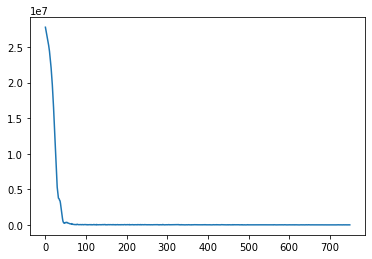

In [265]:
date.models()
date.train_model(10,75)

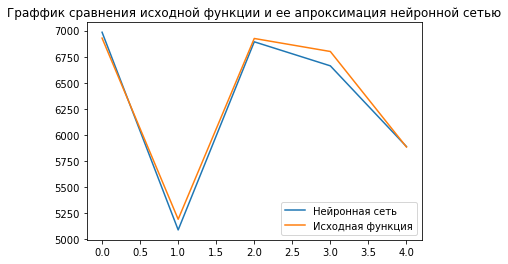

In [266]:
date.plot_results(3,5)

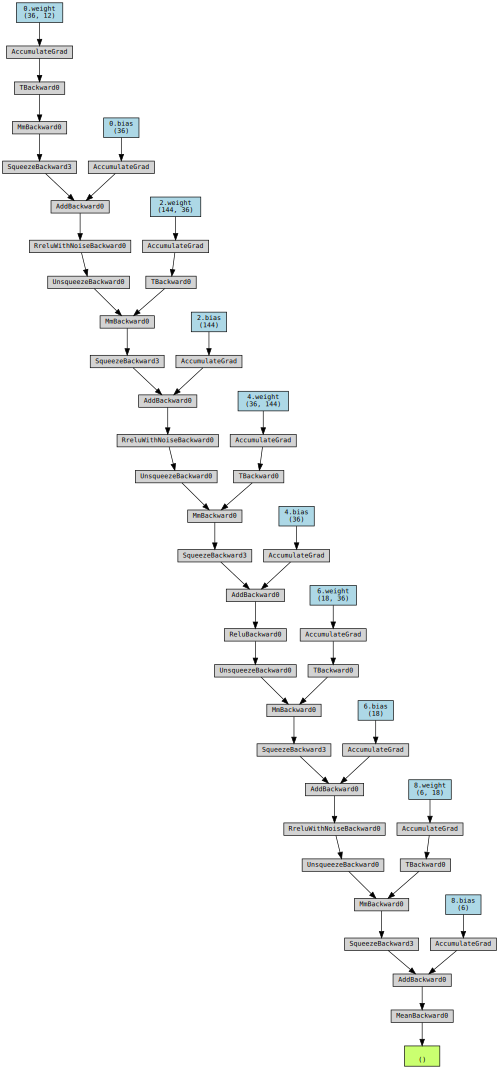

In [267]:
date.plot_model()

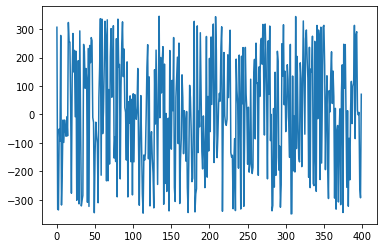

In [76]:
plt.plot(X_test[:400,-1])

In [119]:
X = pd.read_excel('X.xls')
Y = pd.read_excel('Y.xls')
X = X.iloc[:,1:].to_numpy()
Y = Y.iloc[:,1:].to_numpy()

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train)
X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)

In [120]:
X_train = torch.Tensor(X)
y_train = torch.Tensor(Y)

In [273]:
#Задаем 3 слоя 1)линейный с логарифмической функцией активации 
network = nn.Sequential(
    nn.Linear(12,36),
    nn.RReLU(),
    nn.Linear(36, 144),
    nn.RReLU(),
    nn.Linear(144, 36),
    nn.ReLU(),
    nn.Linear(36, 18),
    nn.RReLU(),
    nn.Linear(18, 6)
)
lr = 1e-4
optimizer = torch.optim.Adam(network.parameters())
epoh = 1
iteration = 5
losses = []
for i in range(epoh):
    for j in tqdm(range(iteration)):
        y_pred = network(X_train)
        loss = F.mse_loss(y_pred, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
plt.plot(range(epoh*iteration),losses)


 40%|████      | 2/5 [00:00<00:01,  2.33it/s]

: 

: 

In [272]:
torch.save(network.parameters(),PATH)

NameError: name 'PATH' is not defined

In [159]:
print(f'Выход из модели:{network(X_test[2]).detach().numpy()}\nАбсолютное значения:{y_test[2].detach().numpy()}')

Выход из модели:[4666.02   6066.008  6889.8457 6555.9204 5283.269  4151.014 ]
Абсолютное значения:[4721.293  6116.09   6924.833  6586.6626 5316.7827 4209.6816]


In [145]:
y_test[2].detach().numpy()

tensor([4721.2930, 6116.0898, 6924.8330, 6586.6626, 5316.7827, 4209.6816])

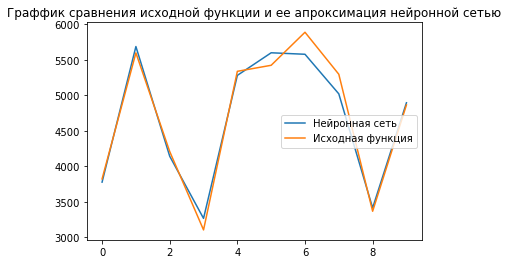

In [192]:
N = 10
N_leg = 6
def plots(N:int,N_leg:int):
    plt.title('Граффик сравнения исходной функции и ее апроксимация нейронной сетью')
    plt.plot([network(i).detach().numpy()[N_leg-1] for i in X_test[:N]],label = 'Нейронная сеть')
    plt.plot([i.detach().numpy()[N_leg-1] for i in y_test[:N]], label = 'Исходная функция')
    plt.legend()

In [168]:
[network(i).detach().numpy()[0] for i in X_test[:,:20]]

[4788.4326,
 3555.1118,
 4633.4976,
 3107.4521,
 4352.4043,
 3449.6821,
 4155.7026,
 3106.5288,
 3278.4324,
 4042.2673,
 3556.8137,
 3384.3428,
 5048.3584,
 4506.6978,
 3212.2664,
 3796.651,
 3661.7405,
 3737.0503,
 3341.8564,
 4359.7944,
 4436.3374,
 3828.4214,
 3119.6082,
 3844.4126,
 3277.503,
 3834.2651,
 4681.376,
 4046.3357,
 4341.839,
 3480.6812,
 3719.2815,
 5013.8413,
 3498.3008,
 3702.4841,
 3932.537,
 3821.1655,
 3458.0454,
 4512.104,
 4094.2214,
 4160.941,
 3449.9878,
 5381.413,
 3436.333,
 3793.144,
 4597.303,
 3728.2039,
 3220.8127,
 3092.1904,
 4007.4158,
 3697.0522,
 4114.3413,
 4112.0103,
 5290.081,
 3492.8623,
 4062.3577,
 4324.6504,
 3740.5903,
 3862.3682,
 4438.054,
 3871.7866,
 5240.564,
 3374.2773,
 4278.937,
 3475.5806,
 4235.335,
 3072.7444,
 3407.3428,
 3449.6626,
 4564.3887,
 3390.8472,
 3545.9592,
 3620.2446,
 4264.429,
 3269.5054,
 4079.2388,
 3538.9014,
 3542.5093,
 3850.2217,
 4447.896,
 3934.8223,
 3616.2844,
 4569.009,
 4273.8936,
 4608.2827,
 3891.9492,

In [146]:
losses[-1]

43328.22265625

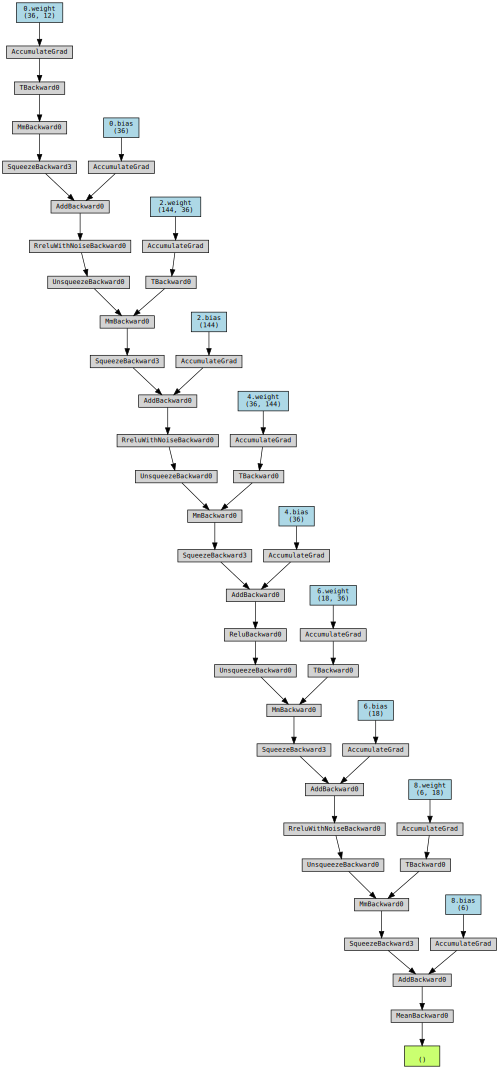

In [147]:
from torchviz import make_dot

make_dot(network(X_test[0]).mean(), params=dict(network.named_parameters()))

In [98]:
m = nn.Sigmoid()
input = torch.tensor(-200)
m(input)

tensor(0.)